# Import

In [1]:
#Goal : create word vector from Game of Throne dataset

from __future__ import absolute_import, division, print_function # for dependency python 2 to 3
# For word encoding
import codecs
# Regex
import glob
# Concurrency
import multiprocessing
# Dealing with operating system like reading files
import os
# Regular Expression
import re
# Natural Language  Toolkit
import nltk
from nltk.corpus import stopwords
# WOrd 2 vec
from gensim.models import Word2Vec
# Dimensional Reductionality
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
#data processing 
import pandas as pd
# Data Visualization
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


# Setting Up Logging

In [2]:
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# nltk.download("punkt") #Pretrained Tokenizer
# nltk.download("stopwords") #Words like a, the, an, of etc

# Prepare Corpus

**Load books from files**

In [4]:

book_filenames = sorted(glob.glob("../input/*.txt"))
# book_filenames = sorted(glob.glob("data/*.txt"))

In [5]:
print("Books Found :")
book_filenames

Books Found :


['../input/got1.txt',
 '../input/got2.txt',
 '../input/got3.txt',
 '../input/got4.txt',
 '../input/got5.txt']

**Combine the books into one string**

In [6]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "UTF-8") as book_file:
        corpus_raw += book_file.read()
    
    print("Corpus is now {0} characters long". format(len(corpus_raw)))
    print()

Reading '../input/got1.txt'...
Corpus is now 1770659 characters long

Reading '../input/got2.txt'...
Corpus is now 4071041 characters long

Reading '../input/got3.txt'...
Corpus is now 6391405 characters long

Reading '../input/got4.txt'...
Corpus is now 8107945 characters long

Reading '../input/got5.txt'...
Corpus is now 9719485 characters long



In [7]:
text = corpus_raw
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = text.strip()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)



In [8]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)

In [9]:
sentences

['this edition contains the complete text of the original hardcover edition.',
 'not one word has been omitted.',
 'a clash of kings a bantam spectra book publishing history bantam spectra hardcover edition published february bantam spectra paperback edition / september spectra and the portrayal of a boxed “s” are trademarks of bantam books, a division of random house, inc. all rights reserved.',
 'copyright © by george r. r. martin.',
 'maps by james sinclair.',
 'heraldic crest by virginia norey.',
 'library of congress catalog card number: - .',
 'no part of this book may be reproduced or transmitted in any form or by any means, electronic or mechanical, including photocopying, recording, or by any information storage and retrieval system, without permission in writing from the publisher.',
 'visit our website at www.bantamdell.com bantam books, the rooster colophon, spectra and the portrayal of a boxed “s” are registered trademarks of random house inc. eisbn: - - - - v .',
 '_r con

In [10]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [11]:
sentences

[['this',
  'edition',
  'contains',
  'the',
  'complete',
  'text',
  'of',
  'the',
  'original',
  'hardcover',
  'edition',
  '.'],
 ['not', 'one', 'word', 'has', 'been', 'omitted', '.'],
 ['a',
  'clash',
  'of',
  'kings',
  'a',
  'bantam',
  'spectra',
  'book',
  'publishing',
  'history',
  'bantam',
  'spectra',
  'hardcover',
  'edition',
  'published',
  'february',
  'bantam',
  'spectra',
  'paperback',
  'edition',
  '/',
  'september',
  'spectra',
  'and',
  'the',
  'portrayal',
  'of',
  'a',
  'boxed',
  '“',
  's',
  '”',
  'are',
  'trademarks',
  'of',
  'bantam',
  'books',
  ',',
  'a',
  'division',
  'of',
  'random',
  'house',
  ',',
  'inc.',
  'all',
  'rights',
  'reserved',
  '.'],
 ['copyright', '©', 'by', 'george', 'r.', 'r.', 'martin', '.'],
 ['maps', 'by', 'james', 'sinclair', '.'],
 ['heraldic', 'crest', 'by', 'virginia', 'norey', '.'],
 ['library', 'of', 'congress', 'catalog', 'card', 'number', ':', '-', '.'],
 ['no',
  'part',
  'of',
  'this',

In [12]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [13]:
sentences

[['edition',
  'contains',
  'complete',
  'text',
  'original',
  'hardcover',
  'edition',
  '.'],
 ['one', 'word', 'omitted', '.'],
 ['clash',
  'kings',
  'bantam',
  'spectra',
  'book',
  'publishing',
  'history',
  'bantam',
  'spectra',
  'hardcover',
  'edition',
  'published',
  'february',
  'bantam',
  'spectra',
  'paperback',
  'edition',
  '/',
  'september',
  'spectra',
  'portrayal',
  'boxed',
  '“',
  '”',
  'trademarks',
  'bantam',
  'books',
  ',',
  'division',
  'random',
  'house',
  ',',
  'inc.',
  'rights',
  'reserved',
  '.'],
 ['copyright', '©', 'george', 'r.', 'r.', 'martin', '.'],
 ['maps', 'james', 'sinclair', '.'],
 ['heraldic', 'crest', 'virginia', 'norey', '.'],
 ['library', 'congress', 'catalog', 'card', 'number', ':', '-', '.'],
 ['part',
  'book',
  'may',
  'reproduced',
  'transmitted',
  'form',
  'means',
  ',',
  'electronic',
  'mechanical',
  ',',
  'including',
  'photocopying',
  ',',
  'recording',
  ',',
  'information',
  'storage',

In [14]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

In [15]:
model

In [16]:
words = model.wv.vocab

In [17]:
words

{'edition': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b208>,
 'contains': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b8d0>,
 'complete': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b5f8>,
 'text': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b9e8>,
 'original': <gensim.models.keyedvectors.Vocab at 0x7fdd5604bac8>,
 'hardcover': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b6a0>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b0f0>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b390>,
 'word': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b940>,
 'omitted': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b1d0>,
 'clash': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b048>,
 'kings': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b518>,
 'bantam': <gensim.models.keyedvectors.Vocab at 0x7fdd5604bb00>,
 'spectra': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b2e8>,
 'book': <gensim.models.keyedvectors.Vocab at 0x7fdd5604b400>,
 'publishing': <gensim.models

In [18]:
# Finding Word Vectors
vector = model.wv['khaleesi']

In [19]:
vector

array([ 0.36686286, -0.76159257, -0.10721496, -0.68175685,  0.5091113 ,
        0.11727236, -0.19688863, -0.4285304 , -0.5786792 ,  0.26231033,
        0.31430092, -0.20986308,  0.05567615,  0.47799504, -0.21314818,
        0.03169785, -0.5349912 ,  0.18445008,  0.1545611 , -0.00715564,
        0.3303184 ,  0.47187477, -0.35287362,  0.13868845, -0.49096066,
       -0.20548137, -0.1726039 ,  0.00965301,  0.20469989,  0.33861768,
       -0.7831393 , -0.465417  ,  0.03139083,  0.15607513,  0.5965256 ,
        0.08940871,  0.04284168,  0.3228337 , -0.18551806, -0.10936106,
        0.11310998,  0.14946492, -0.43062964, -0.17427571,  0.12394727,
        0.13369061,  0.2589777 , -0.38544327,  0.1511755 , -0.08993213,
        0.25409722,  0.7179357 ,  0.02055944,  0.1818093 ,  0.10777229,
       -0.7223447 ,  0.286764  , -0.10066432, -0.30764663,  0.41775322,
        0.13231581, -0.6474263 ,  0.06666516,  0.0139132 , -0.2861804 ,
       -0.07962515,  0.33503664,  0.10231243, -0.10837036,  0.02

In [20]:
# Most similar words
model.wv.most_similar("khaleesi")

[('milord', 0.94413161277771),
 ('magnificence', 0.9380545616149902),
 ('ah', 0.9268966913223267),
 ('is—', 0.9156316518783569),
 ('liar', 0.9154881834983826),
 ('yollo', 0.9154049754142761),
 ('dragons.', 0.9152040481567383),
 ('whitebeard', 0.9115703105926514),
 ('slaves.', 0.9115070104598999),
 ('instructions.', 0.9099457263946533)]

In [21]:
model.wv.most_similar("aerys")

[('tommen', 0.9435549974441528),
 ('justice', 0.9309621453285217),
 ('councillor', 0.9189033508300781),
 ('robert', 0.9173507690429688),
 ('mad', 0.9027869701385498),
 ('reign', 0.8992484211921692),
 ('landing', 0.8967195153236389),
 ('usurper', 0.8960508108139038),
 ('rhaegar', 0.8949975967407227),
 ('decree', 0.8947854042053223)]

In [22]:
model.wv.most_similar("direwolf")

[('silent', 0.8789181709289551),
 ('frostbite', 0.8722947835922241),
 ('ghost', 0.8634055852890015),
 ('unmistakably', 0.8268203735351562),
 ('pageantry', 0.8075007200241089),
 ('backside', 0.7993208169937134),
 ('unafraid', 0.7984336018562317),
 ('wight', 0.7978721261024475),
 ('wolf', 0.797333836555481),
 ('sill', 0.7960951328277588)]

In [23]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [24]:
nearest_similarity_cosmul("stark", "winterfell", "riverrun")
nearest_similarity_cosmul("jaime", "sword", "wine")
nearest_similarity_cosmul("arya", "nymeria", "dragons")

stark is related to winterfell, as tully is related to riverrun
jaime is related to sword, as complained. is related to wine
arya is related to nymeria, as butcher. is related to dragons


'butcher.'

In [25]:
X = model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


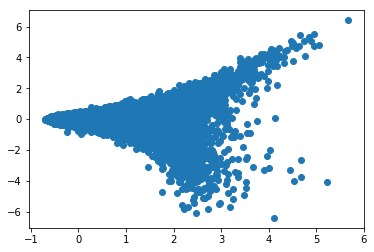

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])

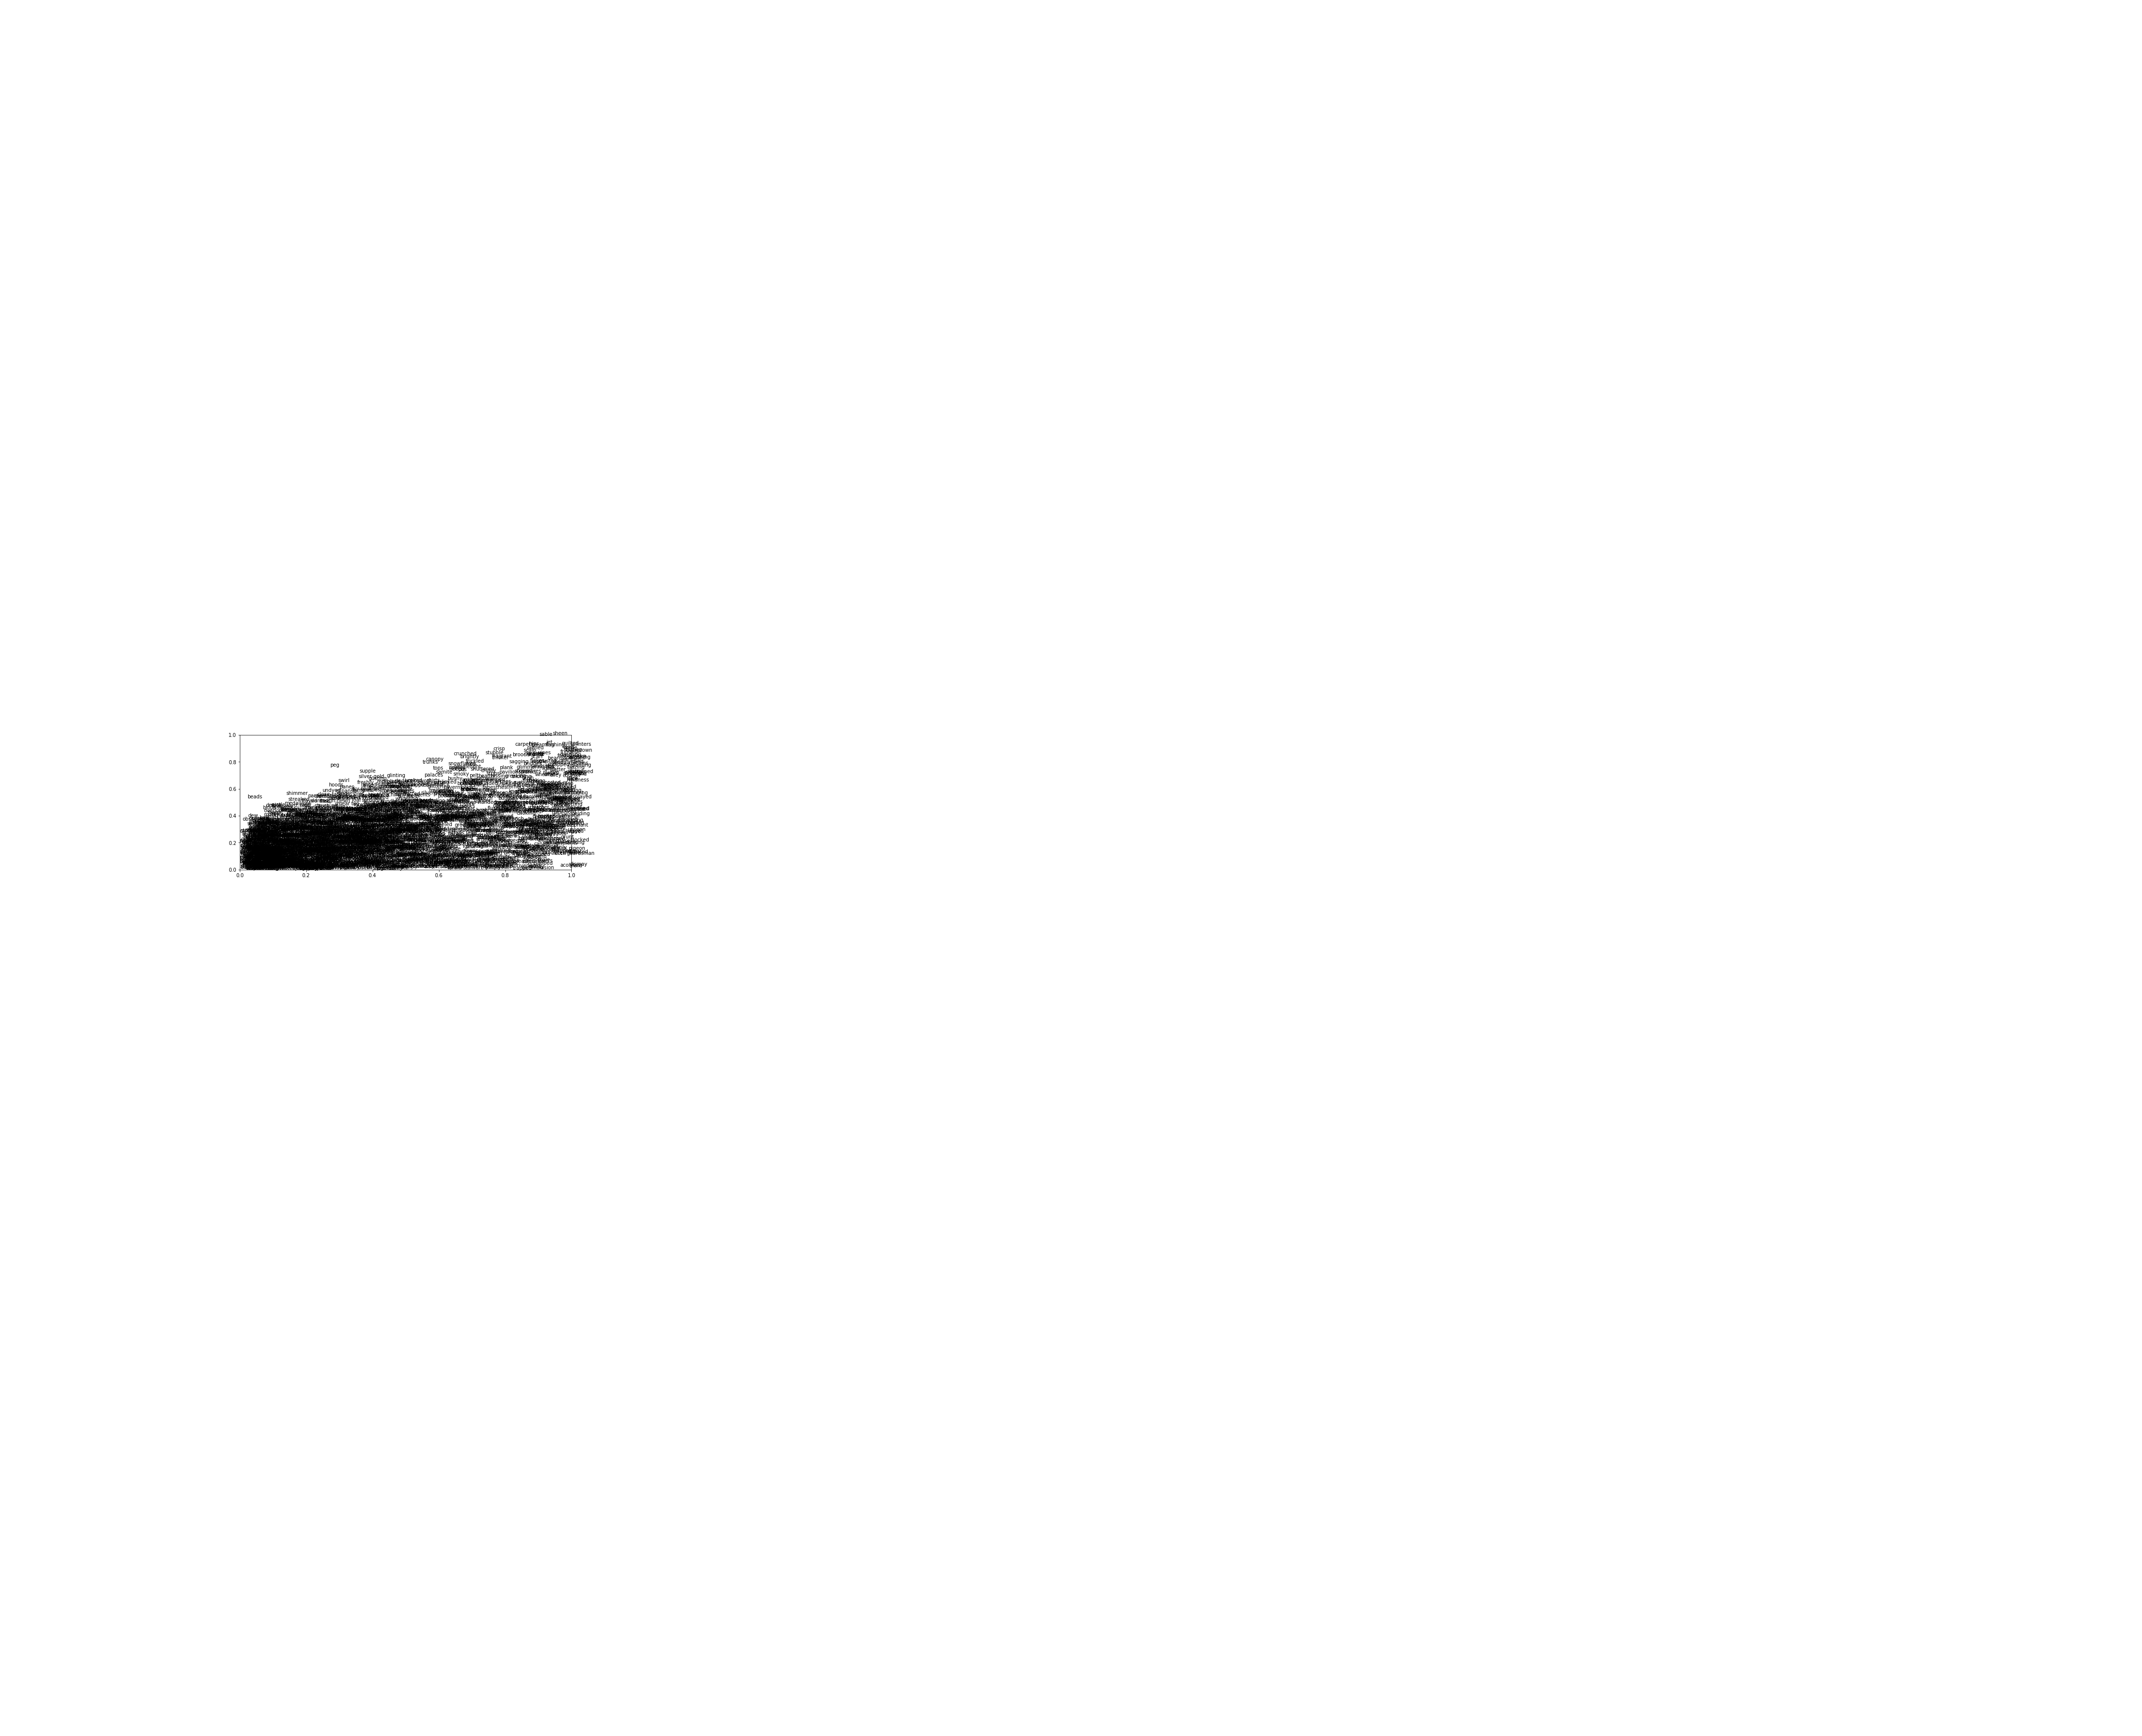

In [27]:
words = list(model.wv.vocab)
plt.figure(figsize=(12,5))
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()